In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Créer une liste d'ETF par pays récupéré via Ishares et MSCI
# Create a list of ETFs by country retrieved via Ishares and MSCI

country_etf = {'USA': 'SPY', 'China': 'FXI', 'Japan': 'EWJ', 'Germany': 'EWG', 'United Kingdom': 'EWU', 'India': 'INDY', 
               'France': 'EWQ', 'Italy': 'EWI', 'Canada': 'EWC', 'South Korea': 'EWY', 'Russia': 'ERUS', 'Brazil': 'EWZ', 'Australia': 
               'EWA', 'Spain': 'EWP', 'Mexico': 'EWW', 'Indonesia': 'EIDO', 'Turkey': 'TUR', 'Taiwan': 'EWT', 'Switzerland': 'EWL', 'Poland': 
               'EPOL', 'Sweden': 'EWD', 'Belgium': 'EWK', 'Thailand': 'THD', 'Austria': 'EWO', 'Ireland': 'EIRL', 'Philippines': 'EPHE', 'Denmark': 
               'EDEN', 'Finland': 'EFNL', 'Israel': 'EIS', 'Netherlands': 'EWN', 'New Zealand': 'ENZL', 'Norway': 'ENOR', 'Malaysia':'EUM', 'Singapore': 
               'EWS', 'Hong Kong': 'EWH', 'Argentina': 'AGT', 'Chile': 'ECH', 'Colombia': 'ICOL', 'Kuwait': 'KNT', 'Peru': 'EPU', 'Qatar': 'QAT', 'Saudi Arabia': 'KSA', 
               'South Africa': 'EZA', 'UAE': 'UAE'}

In [3]:
# Extraire les données sur une plage de temps que l'on récupérera sous forme de liste
# Extract data over a range of times to be retrieved in the form of a list

data_country_etf = yf.download(list(country_etf.values()), start="2015-01-01", end="2024-07-16")

# Filtrer par la date de cloture
# Filter by closing date

data_country_etf = data_country_etf["Adj Close"]


# Renommer les colonnes où l'on donne v (ticker) et k (nom des pays). En utilisant country_etf.items() à la place, on accède directement aux paires clé-valeur du dictionnaire country_etf, ce qui permet de renommer correctement les colonnes du DataFrame data_country_etf.
# Rename columns where v (ticker) and k (country name) are given. Using country_etf.items() instead, we directly access the key-value pairs in the country_etf dictionary, allowing us to correctly rename the columns in the data_country_etf DataFrame.

data_country_etf = data_country_etf.rename(columns={v:k for k,v in country_etf.items()})
print(data_country_etf)

[*********************100%%**********************]  44 of 44 completed
            Argentina      Chile     Denmark    Finland  Indonesia    Ireland  \
Date                                                                            
2015-01-02        NaN  29.102608   40.981834  22.755243  22.009974  30.419575   
2015-01-05        NaN  28.578299   40.327370  22.135857  21.590813  29.786755   
2015-01-06        NaN  28.497063   39.914017  22.058432  21.574373  29.294550   
2015-01-07        NaN  28.637379   39.853741  21.988049  21.903128  29.461546   
2015-01-08        NaN  28.829382   39.914017  22.058432  21.952438  29.575813   
...               ...        ...         ...        ...        ...        ...   
2024-07-09        NaN  26.240000  126.760002  35.009998  20.000000  66.779999   
2024-07-10        NaN  26.889999  128.039993  35.349998  20.180000  67.699997   
2024-07-11        NaN  27.059999  127.860001  35.529999  20.290001  68.739998   
2024-07-12        NaN  27.430000  128.

In [4]:
# Calculer les rendement journaliers puis les rendements annualisés
# Calculate daily returns (log) then annualized yields

daily_log_returns = np.log(1 + data_country_etf.pct_change())
yearly_log_returns = daily_log_returns.groupby(daily_log_returns.index.year).sum()

# Caluler les rendements arithmetiques annualisés
# Calculate annualized arithmetic yields

yearly_ar_returns = np.exp(yearly_log_returns)-1

print(yearly_ar_returns)

      Argentina     Chile   Denmark   Finland  Indonesia   Ireland    Israel  \
Date                                                                           
2015   0.000000 -0.175338  0.191134  0.024027  -0.209018  0.221749  0.082521   
2016   0.000000  0.194657 -0.076142  0.033867   0.169994 -0.085049 -0.039882   
2017   0.209944  0.417876  0.353923  0.237658   0.193979  0.298194  0.127731   
2018  -0.333350 -0.189794 -0.144301 -0.068595  -0.108802 -0.219163 -0.048356   
2019   0.133965 -0.177910  0.243718  0.136375   0.053000  0.281340  0.209322   
2020   0.140378 -0.071324  0.425565  0.201885  -0.071314  0.096267  0.120148   
2021   0.029084 -0.198028  0.148059  0.104992  -0.005991  0.137128  0.228272   
2022  -0.014723  0.251218 -0.114750 -0.172942  -0.001599 -0.188234 -0.270514   
2023   0.000000  0.090141  0.179845 -0.001114   0.025618  0.351208  0.054770   
2024   0.000000 -0.008980  0.140798  0.020643  -0.065515  0.143869  0.127595   

        Norway  New Zealand  Philippine

/var/folders/z4/v92rnlbn7dg06vzshhggfjw40000gn/T/ipykernel_3651/3624331550.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_log_returns = np.log(1 + data_country_etf.pct_change())


In [6]:
geometric_mean_returns = yearly_log_returns.mean()

# Setting initial portfolio value
initial_portfolio_value = 100000

print('Initial Portfolio Value:', initial_portfolio_value, '$')

# Calculating final portfolio value
final_portfolio_value = initial_portfolio_value * (1 + geometric_mean_returns['USA']/100)**26
print('Final Portfolio Value:', round(final_portfolio_value, 2), '$')

# Calculating total period return
period_return = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100
print('Period Return:', round(period_return, 2), '%')

Initial Portfolio Value: 100000 $
Final Portfolio Value: 103095.76 $
Period Return: 3.1 %


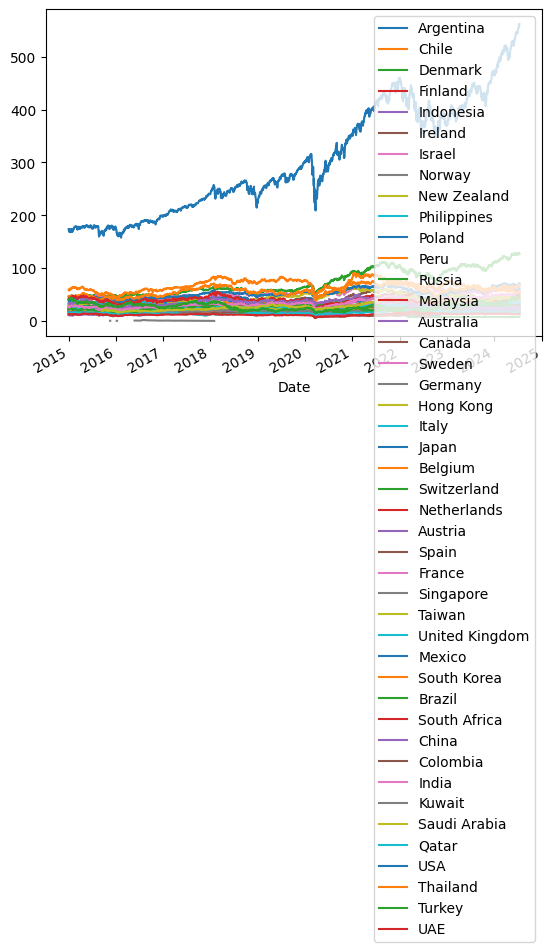

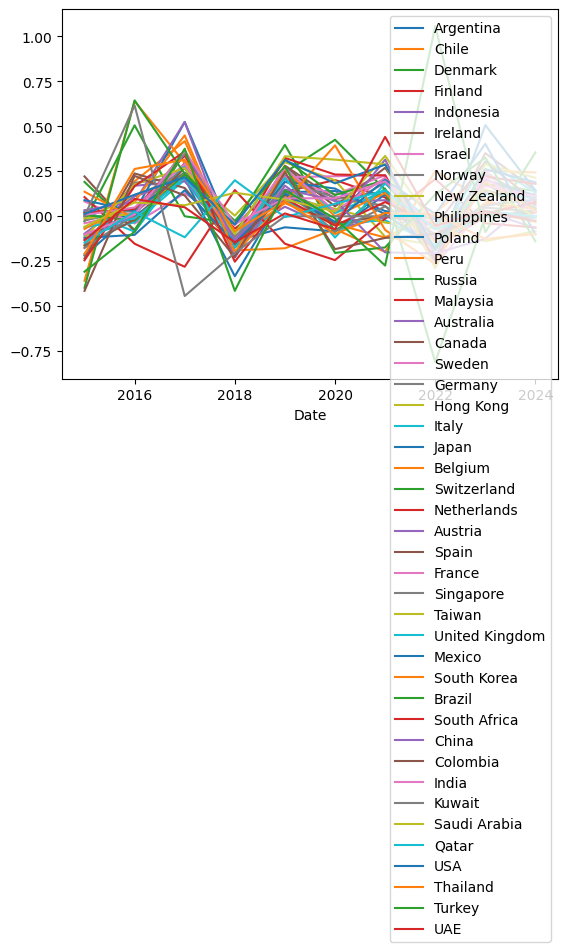

In [18]:
data_country_etf.plot()
yearly_ar_returns.plot()
plt.show()